___________
# Python Code Version 3.0 for
# Climate Mathematics: Theory and Applications - Chapter 5
_____________

<b> Samuel S.P. Shen and Richard C.J. Somerville
____________

This Version 3.0 is authored by Briana Ramirez, edited by Samuel Shen. Liu Yang, Sandra Villamar, and Joaquin Stawsky contributed codes to this version.

Video tutorial for the python code can be found at the following URL:
https://www.youtube.com/channel/UC7D9i0kBMzPTHyEhU0h6W9g

This version is based upon the previous version described in the following box.

In [1]:
######################################################################################################################
#This Python Code for Climate Science is written for the book entitled "Climate Mathematics: Theory and Applications"#
#A Cambridge University Press book authored by SSP Shen and RCJ Somerville in July 2019                              #
#The Python codes were based on the R codes written by Samuel Shen Distinguished Professor,                          #
#San Diego State University, USA and were translated from R by Louis Selstad, Stephen Shen,                          #
#Gregori Clarke, and Dakota Newmann and edited by Samuel Shen.                                                       #
######################################################################################################################

In [2]:
#FIRST TIME Python users*****
#These package need to be installed (on the terminal or anaconda interface) before importing them below. 

#Follow this tutorial for package installation before
# https://towardsdatascience.com/importerror-no-module-named-xyz-45e4a5339e1b

In [3]:
#Change your file path to the folder where your downloaded data is stored
#MAC HELP: https://support.apple.com/guide/mac-help/go-directly-to-a-specific-folder-on-mac-mchlp1236/mac
#PC HELP: https://www.sony.com/electronics/support/articles/00015251
import os
# os.chdir("/Users/sshen/climmath/data")
os.chdir('/Users/HP/Documents/sshen/climmath/data')

In [4]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [5]:
#Style Dictionary to standardize plotting scheme between different python scripts 
import matplotlib.pyplot as plt

styledict = {'xtick.labelsize':20,
             'xtick.major.size':9,
             'xtick.major.width':1,
             'ytick.labelsize':20,
             'ytick.major.size':9,
             'ytick.major.width':1,
             'legend.framealpha':0.0,
             'legend.fontsize':15,
             'axes.labelsize':20,
             'axes.titlesize':25,
             'axes.linewidth':2,
             'figure.figsize':(12,8),
             'savefig.format':'jpg'}
plt.rcParams.update(**styledict)

In [6]:
#Function that creates personalized discrete Colormap
import numpy as np 
from matplotlib import cm as cm1
from matplotlib.colors import ListedColormap, to_rgba

def newColMap(colors):
    """
    This function creates a new color map from a list of colors given
    as a parameter. Recommended length of list of colors is at least 6.
    """
    first = np.repeat([to_rgba(colors[0])], 2, axis = 0)
    last = np.repeat([to_rgba(colors[-1])], 2, axis = 0)
    v = cm1.get_cmap('viridis', 16*(len(colors)-2))
    newcolors = v(np.linspace(0, 1, 16*(len(colors)-2)))
    for (i, col) in enumerate(colors[1:-1]):
        newcolors[16*i : 16*(i+1), :] = to_rgba(col)
    return ListedColormap(np.append(np.append(first,newcolors, axis=0), last, axis=0))


_______

# Chapter 5: Energy Balance Models for Climate 
_______

In [7]:
import numpy as np 
import matplotlib
from matplotlib import cm
import matplotlib.pyplot as plt
from matplotlib.colors import rgb2hex
from matplotlib.patches import Polygon
import matplotlib.mlab as mlab
import pandas as pd
# from mpl_toolkits.basemap import Basemap
from mpl_toolkits import mplot3d
from netCDF4 import Dataset as ds
from urllib import request
import scipy as sp
from scipy import stats as stt
from sklearn import datasets, linear_model
from sklearn.neighbors import KernelDensity as kd
from sklearn.linear_model import LinearRegression
from random import randint
from scipy.stats import norm
import statsmodels
import sklearn
import math
import statistics
import sympy as sy
from sympy import symbols, diff
import statsmodels.api as sm
from datetime import date
from scipy.stats import norm, kurtosis
from sklearn.linear_model import LinearRegression
import seaborn as sns
import statsmodels.api as sm 
import pylab as py 
from scipy.stats import norm, t
import warnings
import os
warnings.filterwarnings("ignore")

_______
# 5.1: EBM for Modeling the Moon's Surface Temperature 
_______

In [8]:
# NASA Diviner Data Source:
# http://pds-geosciences.wustl.edu/lro/lro-l-dlre-4-rdr-v1/lrodlr_1001/data/gcp
d19 = pd.read_csv("tbol_snapshot.pbin4d-19.out-180-0.txt", sep='\s+', header=None)
m19 = np.array(d19.iloc[:,2]).reshape(720,360)

In [9]:
# Set up latitude and longitude sequences 
lat1 = np.linspace(-89.75, 89.75, 360)
lon1 = np.linspace(-189.75, 169.75, 720)

# Created desired color sequence
colors = ['skyblue', 'green', 'darkgreen', 'slateblue', 'indigo',
          'darkviolet', 'yellow', 'orange', 'pink', 'red', 'maroon', 'purple', 'black']
myColMap = newColMap(colors)

# Prepare data
mapmat = m19.T 
mapmat[mapmat == mapmat.max()] = 400
mapmat[mapmat == mapmat.min()] = 0

# Create levels for contour map
clev = np.linspace(mapmat.min(), mapmat.max(), 60)

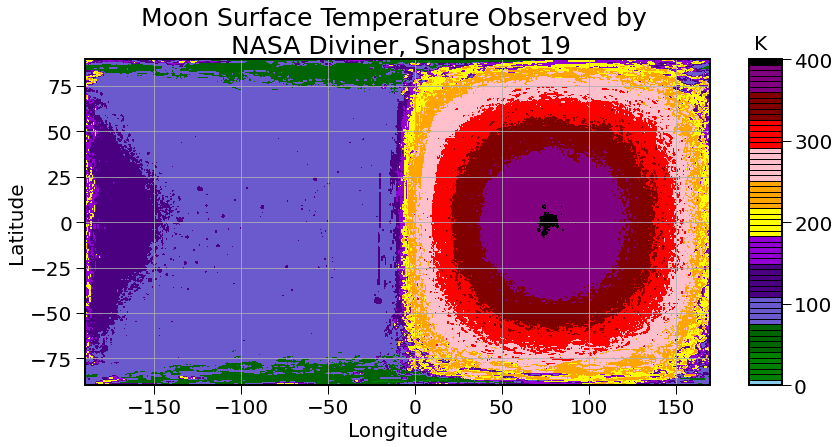

In [10]:
#Fig 5.2 (top panel)
plt.figure(figsize=(14,6))
contf = plt.contourf(lon1, lat1, mapmat, clev, cmap=myColMap)
colbar = plt.colorbar(contf, drawedges=True, ticks=[0, 100, 200, 300, 400], aspect = 10)
plt.title("Moon Surface Temperature Observed by \n NASA Diviner, Snapshot 19")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.text(195, 95, "K", size=20)
plt.grid();

plt.show()

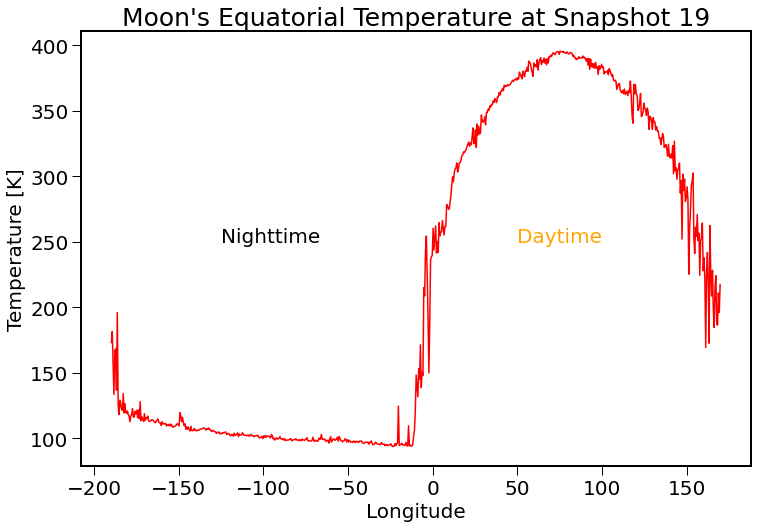

In [11]:
#Fig 5.2 (middle panel)
# Plot the equator temperature for a snapshot 
equ = np.where((lat1 < .5) & (lat1 > -.5))[0]
equatorial = mapmat[equ[0]]
merid = np.where((lon1 < 90.5) & (lon1 > 89.5))[0]
meridian = mapmat[:, merid[0]]

ax = plt.figure()
plt.plot(lon1, equatorial, 'r-')
plt.text(-125, 250, "Nighttime", size=20)
plt.text(50, 250, "Daytime", size=20, color='orange')
plt.xlabel("Longitude")
plt.ylabel("Temperature [K]")
plt.title("Moon's Equatorial Temperature at Snapshot 19");


plt.show()

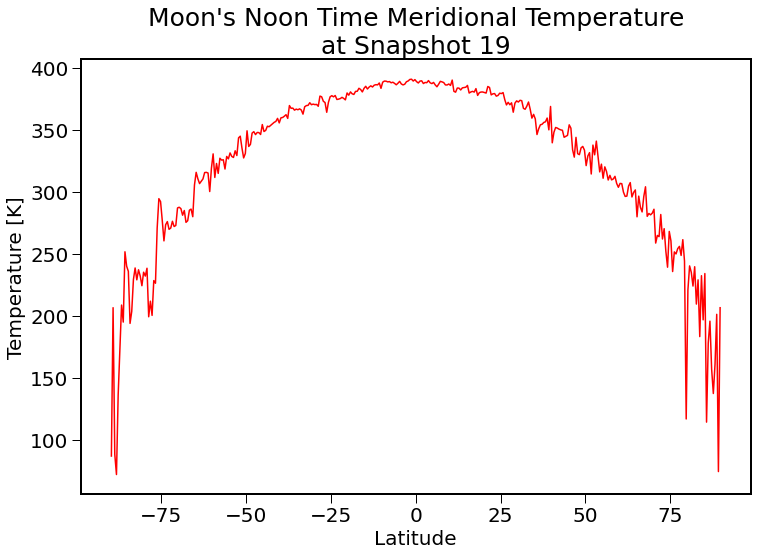

In [12]:
#Fig 5.2 (bottom panel)
# Plot the noon time meridional temperature for a snapshot
ax = plt.figure()
plt.plot(lat1, meridian, 'r-')
plt.xlabel("Latitude")
plt.ylabel("Temperature [K]")
plt.title("Moon's Noon Time Meridional Temperature\nat Snapshot 19");

plt.show()

In [13]:
# Compute the bright side average temperature
bt = np.array(d19.iloc[129600:].astype(np.float))
type(bt)
aw = np.cos(bt[:,1]*np.pi/180)
wbt = bt[:,2]*aw
bta = np.sum(wbt)/np.sum(aw)
print("Average temperature of bright side of moon:", round(bta,3), "Kelvin")

Average temperature of bright side of moon: 302.765 Kelvin


In [14]:
# Compute the dark side average temperature
dt = np.array(d19.iloc[:129600].astype(np.float))
aw = np.cos(dt[:,1]*np.pi/180)
wdt = dt[:,2]*aw
dta = np.sum(wdt)/np.sum(aw)
print("Average temperature of dark side of moon:", round(dta,3), "Kelvin")

Average temperature of dark side of moon: 99.557 Kelvin


5.1.3 EBM Prediction for the Moon Surface Temperature

In [15]:
from scipy import optimize as opt

# Making a function to numerically solve an EBM
def ebm_maker(a, s, l, e, si, ka, t0, he):
    """
    This function accepts a set of Energy Balance Model (EBM) parameters
    and returns a lambda function with those parameters as a function
    of t.
    """
    return lambda t: (1-a)*s*np.cos(l) - e*si*(t**4) - ka*(t - t0)/he

In [16]:
# Equator noon temperature of the moon from an EBM
lat = 0*np.pi/180
sigma = 5.670367e-8
alpha = 0.12
S = 1368
ep = 0.98
k = 7.4e-4
h = 0.4
T0 = 260


fEBM = ebm_maker(alpha, S, lat, ep, sigma, k, T0, h)

# Numerically solve the EBM: fEBM = 0 
res = opt.root(fEBM, x0 = 400)
x0 = res['x'][0]
x0

383.629726096338

_______
# 5.3  EBM for the Global Average Surface Temperature of an Earth with a Nonlinear Albedo Feedback
______

In [17]:
# Define a piecewise albedo function 
a1 = 0.7
a2 = 1 - a1
T1 = 250
T2 = 280
a = []

def ab(T):
    try:
        for i in T:
            if i < T1:
                a.append(a1)
            else:
                if i < T2:
                    a.append(((a1-a2)/(T1-T2))*(i-T2) + a2)
                else:
                    a.append(a2)
        return a
    
    except TypeError:
        if T < T1:
                a.append(a1)
        else:
            if T < T2:
                a.append(((a1-a2)/(T1-T2))*(T-T2) + a2)
            else:
                a.append(a2)
        return a
        
# Define the range of temperatures 
t = np.linspace(200, 350, 1001)

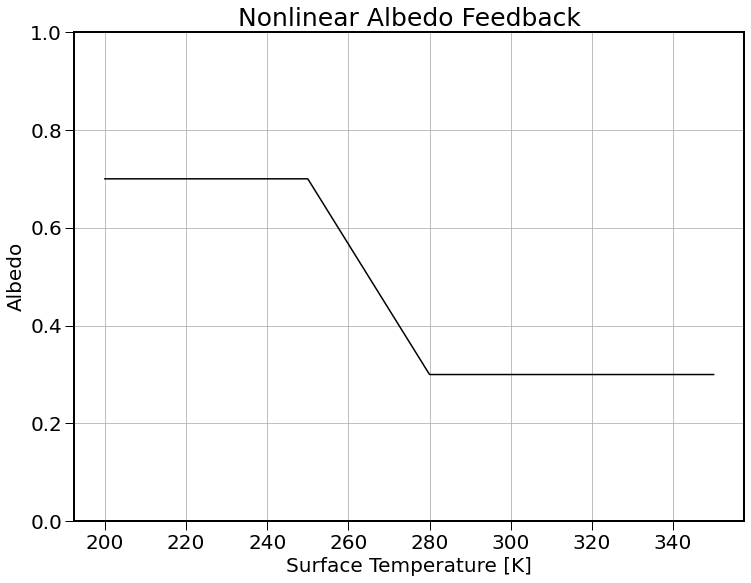

In [18]:
#Fig 5.5
# Plot the albedo as a nonlinear function of T
a = []

plt.figure(figsize = (12,9))
plt.plot(t, ab(t), 'k-')
plt.ylim(0,1)
plt.xlabel("Surface Temperature [K]")
plt.ylabel("Albedo");
plt.title("Nonlinear Albedo Feedback")
plt.grid()
plt.show()

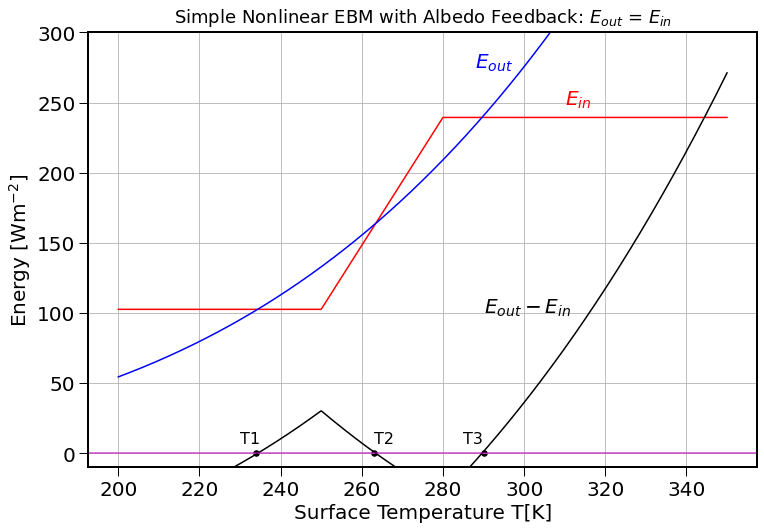

In [19]:
#Fig 5.6
# Formulate and solve an EBM
a = []
S = 1368
ep = 0.6
sg = 5.670373e-8
y1 = [(1-i)*(S/4.0) for i in ab(t)]
y2 = ep*sg*(t**4)
y3 = np.zeros(t.size)

plt.figure(figsize=(12,8))
plt.plot(t, y1, 'r-', label="Incoming Energy")
plt.plot(t, y2, 'b-', label="Outgoing Energy")
plt.plot(t, y2 - y1, 'k-', label="Difference between outgoing and incoming energy")
plt.ylim(-10,300)
plt.axhline(y=0, alpha=.7, color='m')
plt.grid()

# Label the plot
plt.title("Simple Nonlinear EBM with Albedo Feedback: $E_{out}$ = $E_{in}$", fontsize = 18, pad = 10)
plt.xlabel("Surface Temperature T[K]")
plt.ylabel("Energy [Wm$^{-2}$]")

plt.text(288,275,"$E_{out}$", fontsize=20, color="b")
plt.text(310,248,"$E_{in}$", fontsize=20, color="r")
plt.text(290,100,"$E_{out} - E_{in}$", fontsize=20, color="k")

plt.text(230,7, "T1", fontsize=16)
plt.text(263,7, "T2", fontsize=16)
plt.text(285,7, "T3", fontsize=16)

plt.scatter(234,0,s=30, c = "black")
plt.scatter(263,0,s=30, c = "black")
plt.scatter(290,0,s=30, c = "black")

plt.show()

In [20]:
# Verify the roots
S = 1368
ep = 0.6
sg = 5.670373e-8
roots = []

# Redefine the albedo smooth function approximation using lambda variable 
ab_smooth = lambda t: 0.5 - 0.2 *np.tanh((t-265)/10)

# Redefine the first albedo function in simpler terms
a1 = 0.7
a2 = 0.3
T1 = 250
T2 = 280
def ab(T):
    if T <= 250:
        a = a1
    elif 250 < T < 280:
        a = ((a1-a2)/(T1-T2))*(T-T2) + a2
    else:
        a = a2
    return a

# Define function f(T)
def f(T):
    try:
        roots = ep*sg*T**4 - (1 - ab(T))*(S/4.0)
        
    except TypeError:
        if len(ab(T)) > 1: # In case there is more than one root
            for i in ab(T):
                r = ep*sg*i**4 - (1 - i)*(S/4.0)
                roots.append(r)
        else: # In case there exists one root
            roots = ep*sg*i**4 - (1 - ab(T)[0])*(S/4.0)
    return roots

# Find roots of Albedo function 
opt.bisect(f, 260, 275)

263.4303178655142

In [21]:
opt.bisect(f, 275, 295)

289.62784771008387

In [22]:
opt.bisect(f, 220, 240)

234.33983543986528